# Tratamiento de dataset

### Imports

In [1]:
import cv2
import numpy as np

import zipfile
import os
import shutil
import json

### Funciones

In [2]:
def extract(name):
    with zipfile.ZipFile(name+'.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

In [3]:
def remove_files():
    os.remove("ball_markup.json")
    os.remove("events_markup.json")
    shutil.rmtree("segmentation_masks")

In [4]:
def get_video(vid,game):
    extract(game+'_'+str(vid))
    cap = cv2.VideoCapture('./'+game+'_'+str(vid)+'.mp4')

    with open('ball_markup.json') as json_file:
        data = json.load(json_file)
    
    for i in data:
        name = int(str(vid)+"{:07d}".format(int(i)))
        outF = open("./tags/"+str(name)+".txt", "w")
        b,g,r = cv2.split(cv2.imread("segmentation_masks/"+str(i)+".png"))
        img = g
        img = cv2.resize(img,(320,180))
        thresh = cv2.threshold(img,128,255,cv2.THRESH_BINARY)[1]
        contours,hierarchy = cv2.findContours(thresh, 1, 2)
        for x in range(len(contours)):
            cnt = contours[x]
            x,y,w,h = cv2.boundingRect(cnt)
            if w<=5 or h<=5:
                continue
            outF.write("0 "+str((x+(w/2))/320)+" "+str((y+(h/2))/180)+" "+str(w/320)+" "+str(h/180)+"\n")
        img = r
        img = cv2.resize(img,(320,180))
        thresh = cv2.threshold(img,128,255,cv2.THRESH_BINARY)[1]
        contours,hierarchy = cv2.findContours(thresh, 1, 2)
        for x in range(len(contours)):
            cnt = contours[x]
            x,y,w,h = cv2.boundingRect(cnt)
            if w<=5 or h<=5:
                continue
            outF.write("1 "+str((x+(w/2))/320)+" "+str((y+(h/2))/180)+" "+str(w/320)+" "+str(h/180)+"\n")
            #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),1)
        if(data[str(i)]['x']!=-1):
            outF.write("2 "+str(data[str(i)]['x']/(1920))+" "+str(data[str(i)]['y']/(1080))+" "+str(30/320)+" "+str(30/180)+"\n")
        outF.close()
        cap.set(cv2.CAP_PROP_POS_FRAMES,int(i))
        ret, frame = cap.read()
        cv2.imwrite('./images/'+str(name)+'.jpg',frame)
    remove_files()

### Ejecutar codigo

In [5]:
get_video(1,'game')

In [6]:
get_video(2,'game')

In [7]:
get_video(3,'game')

In [8]:
get_video(4,'game')

In [9]:
get_video(5,'game')

### Pruebas

In [300]:
b,g,r = cv2.split(cv2.imread("segmentation_masks/36.png"))
img = r
img = cv2.resize(img,(320,180))
thresh = cv2.threshold(img,128,255,cv2.THRESH_BINARY)[1]
contours,hierarchy = cv2.findContours(thresh, 1, 2)
for a in range(len(contours)):
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    if w<=5 or h<=5:
        continue
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),1)

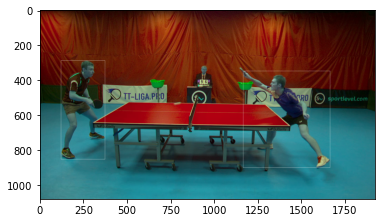

In [303]:
plt.imshow(img)

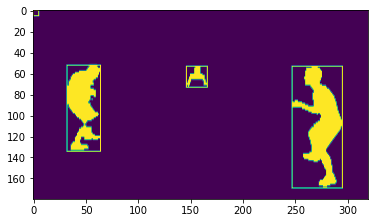

In [189]:
img = cv2.rectangle(img,(0,0),(5,5),(255,255,255),1)
plt.imshow(img)

In [283]:
(x+(w/2))/320

0.128125

In [284]:
(y+(h/2))/180

0.5277777777777778

In [192]:
w*6

192

In [193]:
h*6

492

In [201]:
#data['186']['x']/(1920)

In [202]:
#data['186']['y']/(1080)

In [253]:
cap = cv2.VideoCapture('./game_1.mp4')

In [197]:
#cap.set(cv2.CAP_PROP_FPS, 5)

False

In [280]:
cap.set(cv2.CAP_PROP_POS_FRAMES,36)

True

In [281]:
ret, frame = cap.read()

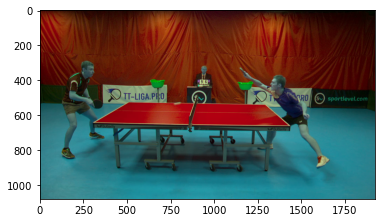

In [282]:
plt.imshow(frame)

In [103]:
import matplotlib.pyplot as plt

In [72]:
fps = cap.get(cv2.CAP_PROP_FPS)
print("FPS: {0}".format(fps))

FPS: 120.0


In [259]:
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

88599


In [ ]:
img = cv2.rectangle(frame,(((x+(w/2))/320)*1920,((y+(h/2))/180)*1080),(x+w,y+h),(255,255,255),1)

In [302]:
img = cv2.rectangle(frame,(int(x*1920/320),int(y*1080/180)),(int(x*1920/320)+w*6,int(y*1080/180)+h*6),(255,255,255),1)

In [287]:
y*1920/320

288.0

In [307]:
cv2.imwrite('./prueba.jpg',img)

True

In [315]:
name = str(1)+"{:07d}".format(int('14'))
outF = open("./tags/"+str(name)+".txt", "w")

In [316]:
outF.close()

In [10]:
from PIL import Image

In [12]:
b,g,r = cv2.split(cv2.imread("segmentation_masks/36.png"))
img = r
img = cv2.resize(img,(320,180))
thresh = cv2.threshold(img,128,255,cv2.THRESH_BINARY)[1]
contours,hierarchy = cv2.findContours(thresh, 1, 2)
for a in range(len(contours)):
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    if w<=5 or h<=5:
        continue
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),1)

In [24]:
im = Image.open(r"./images/10000036.jpg")

In [47]:
#croped = im.crop((x, y, 1920 - x - w , 1080 - y - h))
croped = im.crop((x*6, y*6, x*6+w*6 , y*6+h*6))

In [48]:
croped.show()

In [30]:
im.size

(1920, 1080)

In [49]:
cv2.imwrite('./table.jpg',croped)

TypeError: Expected Ptr<cv::UMat> for argument 'img'

In [52]:
croped.save("./table", "jpeg")